In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
training_data_x = pd.read_csv("../archive/exoTrain.csv").iloc[:, 1:]
with open("../archive/ProcessData.npy", 'rb') as f:
        train_x = np.load(f)
        test_x = np.load(f)
train_x_df = pd.DataFrame(train_x, columns=training_data_x.columns)
#https://stackoverflow.com/questions/50087135/convert-dataframe-from-wide-to-long-pandas
#thttps://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.wide_to_long.html#pandas.wide_to_long
print(train_x_df)
print(training_data_x.head())
train_x_df["id"] = train_x_df.index
train_x_df = pd.wide_to_long(train_x_df, ["FLUX"], i="id", j="time", sep='.').reset_index().sort_values(['id','time'])
print(train_x_df.head())

        FLUX.1    FLUX.2    FLUX.3    FLUX.4    FLUX.5    FLUX.6    FLUX.7  \
0    -1.470182 -1.265015 -0.292911  0.380301  0.540297  1.652947  1.741382   
1     0.591357  0.530126  0.945562  0.667802  1.363121  1.291878  1.586202   
2     1.030808  1.040210  1.000268  0.970761  0.894847  0.916974  0.917612   
3     1.087530  1.157041  1.007028  0.992972  1.061646  1.048133  1.083863   
4     1.109711  1.128772  1.149154  1.138471  1.112945  1.102053  1.076637   
...        ...       ...       ...       ...       ...       ...       ...   
5082 -5.454599 -5.517507 -4.674184 -5.776261 -4.035608 -4.049852 -4.479525   
5083  2.663557  2.464063  2.583881  2.493451  2.276901  1.914430  1.911576   
5084  1.041713  1.088630  1.054127  0.982486  1.198991  1.166639  1.149707   
5085 -5.419745 -2.802504  4.189569  3.497709 -1.930011  0.837622 -4.143010   
5086  2.403905  2.360202  2.342961  2.388392  2.158573  1.965116  1.774852   

        FLUX.8    FLUX.9   FLUX.10  ...  FLUX.3188  FLUX.3189  

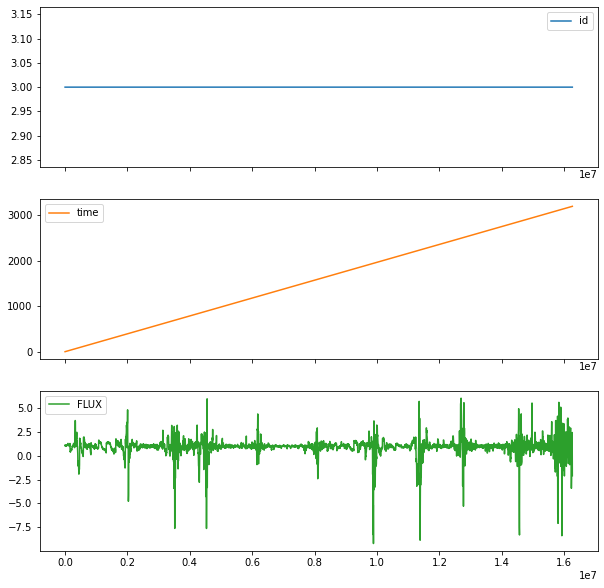

In [3]:
train_x_df[train_x_df['id'] == 3].plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

In [4]:
from tsfresh import extract_features
from tsfresh.feature_extraction import MinimalFCParameters, EfficientFCParameters

#13min for exotest
extracted_features = extract_features(train_x_df, column_id= "id", column_sort= "time", 
                                      column_value= "FLUX", default_fc_parameters= EfficientFCParameters())

Feature Extraction: 100%|██████████| 10/10 [48:00<00:00, 288.08s/it] 


In [5]:
extracted_features

,FLUX__variance_larger_than_standard_deviation,FLUX__has_duplicate_max,FLUX__has_duplicate_min,FLUX__has_duplicate,FLUX__sum_values,FLUX__abs_energy,FLUX__mean_abs_change,FLUX__mean_change,FLUX__mean_second_derivative_central,FLUX__median,...,FLUX__permutation_entropy__dimension_5__tau_1,FLUX__permutation_entropy__dimension_6__tau_1,FLUX__permutation_entropy__dimension_7__tau_1,FLUX__query_similarity_count__query_None__threshold_0.0,"FLUX__matrix_profile__feature_""min""__threshold_0.98","FLUX__matrix_profile__feature_""max""__threshold_0.98","FLUX__matrix_profile__feature_""mean""__threshold_0.98","FLUX__matrix_profile__feature_""median""__threshold_0.98","FLUX__matrix_profile__feature_""25""__threshold_0.98","FLUX__matrix_profile__feature_""75""__threshold_0.98"
0,1.0,0.0,0.0,1.0,2867.499418,4.088118e+04,1.342412,-0.000924,-0.000861,0.974486,...,4.462274,5.937417,7.074593,NaN,1.008109,4.287168,2.425250,2.420824,1.956660,2.873635
1,1.0,0.0,0.0,1.0,864.929768,1.511608e+05,2.508882,-0.001043,-0.000087,0.980689,...,4.570206,6.112357,7.297366,NaN,1.383048,6.823455,4.410964,4.651261,3.641332,5.322386
2,1.0,0.0,0.0,1.0,3084.115675,2.754916e+04,0.761148,0.001711,0.000363,0.997233,...,4.303463,5.657634,6.719455,NaN,1.441220,7.058445,4.061072,4.071088,2.994894,5.100208
3,0.0,0.0,0.0,1.0,3005.885344,5.816551e+03,0.383077,-0.000993,-0.000721,0.997983,...,4.614958,6.168932,7.359181,NaN,1.002003,4.102890,2.635875,2.684486,2.212392,3.099313
4,1.0,0.0,0.0,1.0,2794.111470,1.817633e+04,0.579667,0.000114,0.000050,1.026610,...,3.988287,5.192935,6.140255,NaN,1.328087,7.131917,3.628071,3.606312,2.818823,4.338335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,1.0,0.0,0.0,1.0,2802.656624,3.409011e+04,0.894470,0.001778,0.000039,0.962428,...,4.027007,5.272050,6.263068,NaN,1.303179,6.645007,3.870191,3.842545,3.214071,4.510914
5083,1.0,0.0,0.0,1.0,-847.759941,3.959582e+05,3.746137,-0.000558,0.000362,0.961720,...,4.524230,6.013262,7.148843,NaN,1.350840,6.732772,4.432152,4.651143,3.723720,5.281853
5084,1.0,0.0,0.0,1.0,960.693739,1.093295e+06,8.553619,0.000421,-0.000018,0.965852,...,4.541941,6.090627,7.290870,NaN,1.385165,6.897792,4.885986,5.076693,4.229314,5.566391
5085,1.0,0.0,0.0,1.0,1931.601090,4.345731e+05,6.869259,0.001800,-0.000491,1.015086,...,4.760930,6.448206,7.673413,NaN,0.798803,2.911636,2.125395,2.181555,1.946075,2.359677


In [6]:
extracted_features.to_pickle("./TS-Train.pkl")

In [10]:
testing_data_x = pd.read_csv("../archive/exoTest.csv").iloc[:, 1:]
test_x_df = pd.DataFrame(test_x, columns=testing_data_x.columns)

test_x_df["id"] = test_x_df.index
test_x_df = pd.wide_to_long(test_x_df, ["FLUX"], i="id", j="time", sep='.').reset_index().sort_values(['id','time'])
print(test_x_df.head())

      id  time       FLUX
0      0     1 -12.932039
570    0     2 -10.810140
1140   0     3  -9.326861
1710   0     4  -5.251348
2280   0     5  -4.975189


In [11]:
extracted_features = extract_features(test_x_df, column_id= "id", column_sort= "time", 
                                      column_value= "FLUX", default_fc_parameters= EfficientFCParameters())

Feature Extraction: 100%|██████████| 10/10 [04:52<00:00, 29.22s/it]


In [12]:
extracted_features

,FLUX__variance_larger_than_standard_deviation,FLUX__has_duplicate_max,FLUX__has_duplicate_min,FLUX__has_duplicate,FLUX__sum_values,FLUX__abs_energy,FLUX__mean_abs_change,FLUX__mean_change,FLUX__mean_second_derivative_central,FLUX__median,...,FLUX__permutation_entropy__dimension_5__tau_1,FLUX__permutation_entropy__dimension_6__tau_1,FLUX__permutation_entropy__dimension_7__tau_1,FLUX__query_similarity_count__query_None__threshold_0.0,"FLUX__matrix_profile__feature_""min""__threshold_0.98","FLUX__matrix_profile__feature_""max""__threshold_0.98","FLUX__matrix_profile__feature_""mean""__threshold_0.98","FLUX__matrix_profile__feature_""median""__threshold_0.98","FLUX__matrix_profile__feature_""25""__threshold_0.98","FLUX__matrix_profile__feature_""75""__threshold_0.98"
0,1.0,0.0,0.0,1.0,1130.670803,344934.631226,4.261390,0.005047,-0.002169,1.061744,...,4.562431,6.097301,7.285923,NaN,0.957484,4.105404,2.503665,2.488591,2.116568,2.896202
1,1.0,0.0,0.0,1.0,2163.217245,63924.411778,1.086810,0.000051,-0.000041,0.989339,...,3.323537,4.264395,5.077511,NaN,1.525500,7.233385,4.464618,4.509918,3.688818,5.328701
2,1.0,0.0,0.0,1.0,2823.466823,33947.844717,1.336943,-0.000411,-0.000136,0.921813,...,4.526945,6.055892,7.232893,NaN,0.895409,4.275312,2.535858,2.547408,2.105412,2.974662
3,1.0,0.0,0.0,1.0,928.597403,539664.995225,4.019426,-0.008349,0.000784,0.921557,...,4.233902,5.599959,6.709371,NaN,1.883955,9.855097,6.669120,7.043268,5.757595,8.079512
4,1.0,0.0,0.0,1.0,2880.305725,55841.614482,1.494237,-0.000876,0.000079,0.993523,...,4.520419,6.014537,7.152531,NaN,2.500939,13.316909,9.931172,10.646580,9.131864,11.832542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,1.0,0.0,0.0,1.0,2852.771853,18513.161850,0.891759,-0.000251,0.000018,0.985880,...,4.616913,6.180227,7.346031,NaN,1.222758,4.558754,2.866481,2.872754,2.427679,3.272681
566,1.0,0.0,0.0,1.0,2758.978353,147694.904434,3.230355,0.000315,0.000075,1.040559,...,4.715800,6.358135,7.554642,NaN,1.175080,6.074268,4.160930,4.275322,3.651185,4.787817
567,1.0,0.0,0.0,1.0,2262.784023,229372.517903,4.872050,-0.004255,-0.000349,0.969876,...,4.691370,6.313894,7.514407,NaN,1.078354,5.114053,3.864928,3.934237,3.552199,4.269718
568,1.0,0.0,0.0,1.0,3402.091911,593834.583297,7.433712,-0.000294,0.000361,1.001441,...,4.702602,6.349762,7.570681,NaN,1.234686,4.359914,3.012625,3.086816,2.634682,3.458778


In [13]:
extracted_features.to_pickle("./TS-Test.pkl")